In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
cols = ['quality']

In [7]:
xcols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [8]:
l = [[x for x in df[cols]] for cols in xcols]

In [9]:
x = np.array(l,dtype = 'float32')

In [10]:
x

array([[ 7.4  ,  7.8  ,  7.8  , ...,  6.3  ,  5.9  ,  6.   ],
       [ 0.7  ,  0.88 ,  0.76 , ...,  0.51 ,  0.645,  0.31 ],
       [ 0.   ,  0.   ,  0.04 , ...,  0.13 ,  0.12 ,  0.47 ],
       ...,
       [ 3.51 ,  3.2  ,  3.26 , ...,  3.42 ,  3.57 ,  3.39 ],
       [ 0.56 ,  0.68 ,  0.65 , ...,  0.75 ,  0.71 ,  0.66 ],
       [ 9.4  ,  9.8  ,  9.8  , ..., 11.   , 10.2  , 11.   ]],
      dtype=float32)

In [12]:
x.dtype

dtype('float32')

In [13]:
x_vals = x.transpose()

In [14]:
x_vals

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]],
      dtype=float32)

In [15]:
x_vals.shape

(1599, 11)

In [16]:
x_vals.dtype

dtype('float32')

In [17]:
y = np.array([x for x in df['quality']], dtype = 'float32')

In [18]:
y

array([5., 5., 5., ..., 6., 5., 6.], dtype=float32)

In [19]:
y_vals = y.transpose()

In [20]:
y_vals.shape

(1599,)

In [21]:
x_data = tf.placeholder(shape = [None, 11], dtype = tf.float32)
y_data = tf.placeholder(shape = [None,1], dtype = tf.float32)

In [22]:
m = tf.Variable(tf.random_normal(shape=[1599,11]))
c = tf.Variable(tf.random_normal(shape=[1,1]))

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model = tf.add(tf.multiply(m,x_data),c)

In [24]:
loss = tf.reduce_mean(tf.square(y_data - model))

In [25]:
gradient = tf.train.GradientDescentOptimizer(0.05)

In [26]:
train_ = gradient.minimize(loss)

In [27]:
init = tf.global_variables_initializer()

In [28]:
sess = tf.Session()

In [29]:
sess.run(init)

In [30]:
y_vals.dtype

dtype('float32')

In [31]:
y_vals.shape

(1599,)

In [35]:
y_vals.shape = (1599,1)

In [36]:
y_vals.shape

(1599, 1)

In [42]:
lo = []
for i in range(50000):
    sess.run(train_, feed_dict={x_data: x_vals, y_data: y_vals})
    temp = sess.run(loss, feed_dict={x_data: x_vals, y_data: y_vals})
    lo.append(temp)
    if (i+1)%5000 == 0:
        print('Step ' + str(i+1) + ' m: ' + str(sess.run(m)) + ' c: ' + str(sess.run(c)))
        print('L',temp)

Step 5000 m: [[-0.08523306 -0.47105387  0.82367426 ... -0.1739834  -0.25854352
  -0.06709908]
 [-0.08084911 -1.446805    0.09168409 ... -0.22648434 -0.7657996
  -0.06436146]
 [-0.0808666  -0.5539145   0.69300896 ... -0.20342283  0.54831475
  -0.06436146]
 ...
 [ 0.05861347 -1.486837    2.0798802  ...  0.1214157   0.07967323
   0.03357226]
 [-0.10687014 -1.9611666   0.38302317 ... -0.18573847  0.28169394
  -0.06183406]
 [ 0.06153093  0.54327804 -0.12886742 ...  0.10881066  0.40233913
   0.03357226]] c: [[5.6307073]]
L 0.3789785
Step 10000 m: [[-0.08523306 -0.47701433  0.82367426 ... -0.17566994 -0.26627636
  -0.06709908]
 [-0.08085302 -1.4308429   0.09168409 ... -0.21906336 -0.76788574
  -0.06436146]
 [-0.0808666  -0.55838484  0.6921149  ... -0.20082891  0.53014743
  -0.06436146]
 ...
 [ 0.05861347 -1.4707438   2.0798802  ...  0.11761398  0.08622035
   0.033572  ]
 [-0.10688592 -1.9498156   0.380788   ... -0.18298312  0.26505747
  -0.06183406]
 [ 0.06153794  0.5450662  -0.12314226 ...  

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

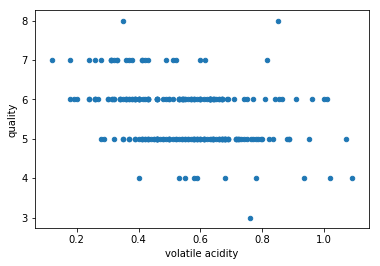

In [44]:
df.sample(250).plot(kind='scatter', x= 'volatile acidity', y='quality')

Text(0,0.5,'Loss')

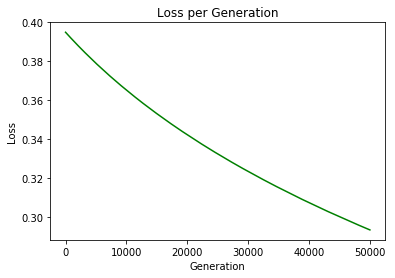

In [45]:
plt.plot(lo, 'g-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')